In [1]:
import os
import numpy as np

In [2]:
from skimage import data, io, filters, feature, segmentation
from skimage import color, exposure, measure, morphology, draw
from matplotlib import pyplot as plt
from skimage import transform as tf

In [3]:
# 从data中获取测试图像并显示

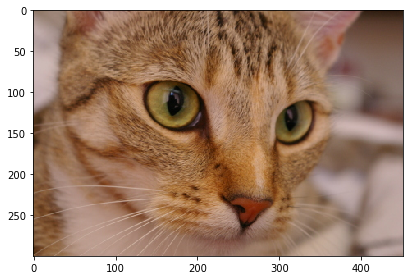

In [4]:
image = data.chelsea()
io.imshow(image)
io.show()

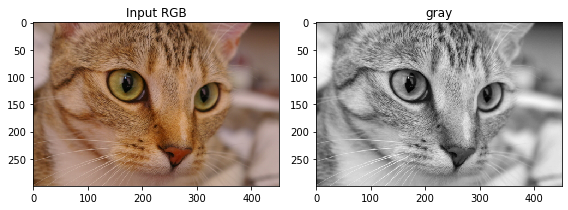

In [5]:
gray = color.rgb2gray(image)
fig,axes = plt.subplots(1,2,figsize=(8,4))   #返回一个figure图像，和ax子图列表
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title("Input RGB")
ax[1].imshow(gray,cmap=plt.cm.gray)    # cmap = colormap
ax[1].set_title("gray")

fig.tight_layout()
plt.show()

In [6]:
# 通道分离操作

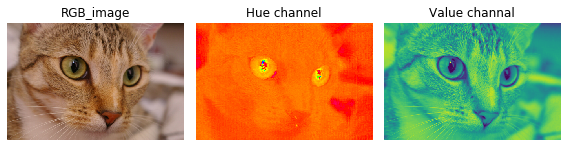

In [7]:
hsv_img = color.rgb2hsv(image)
hue_img = hsv_img[:,:,0]
value_img = hsv_img[:,:,2]

fig,(ax0,ax1,ax2) = plt.subplots(ncols=3,figsize=(8,2))
ax0.imshow(image)
ax0.set_title("RGB_image")
ax0.axis('off')
ax1.imshow(hue_img,cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channal")
ax2.axis('off')

fig.tight_layout()
plt.show()

In [8]:
# 滤波操作

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


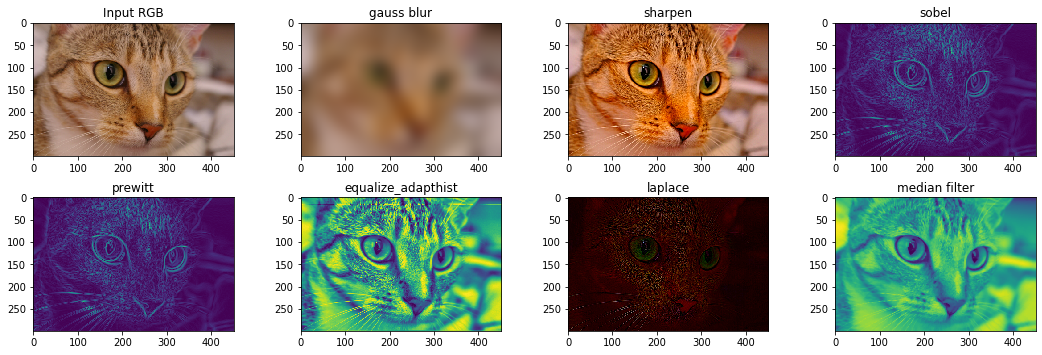

In [11]:
image = data.chelsea()
gray = color.rgb2gray(image)
blur = filters.gaussian(image,15)
usm = filters.unsharp_mask(image,3,1.0)
sobel = filters.sobel(gray)
prewitt = filters.prewitt(gray)
eh = exposure.equalize_adapthist(gray)
lapl = filters.laplace(image, 3)
median = filters.median(gray)

fig,axes = plt.subplots(2,4,figsize=(15,5))
ax1 = axes.ravel()
ax1[0].imshow(image)
ax1[0].set_title("Input RGB")
ax1[1].imshow(blur)
ax1[1].set_title("gauss blur")
ax1[2].imshow(usm)
ax1[2].set_title("sharpen")
ax1[3].imshow(sobel)
ax1[3].set_title("sobel")
ax1[4].imshow(prewitt)
ax1[4].set_title("prewitt")
ax1[5].imshow(eh)
ax1[5].set_title("equalize_adapthist")
ax1[6].imshow(lapl)
ax1[6].set_title("laplace")
ax1[7].imshow(median)
ax1[7].set_title("median filter")

fig.tight_layout()
plt.show()

107


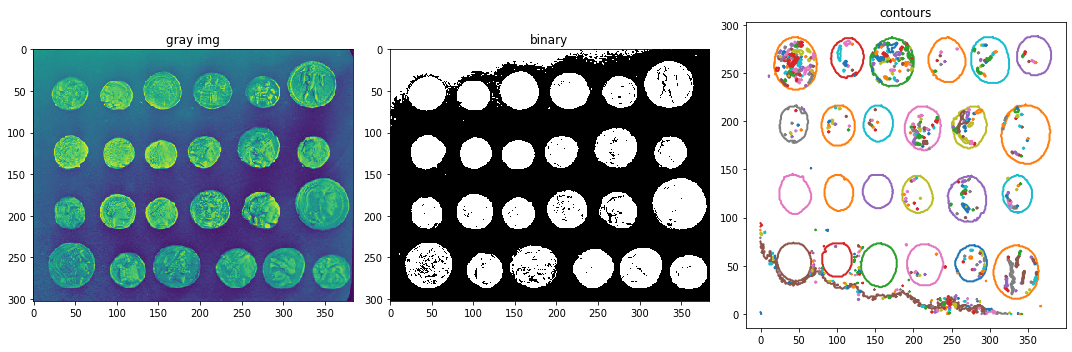

In [21]:
# 二值化
image = data.coins()
gray = color.rgb2gray(image)
ret = filters.threshold_otsu(gray)
print(ret)
width,high = gray.shape
binary = gray > ret
fig,axes = plt.subplots(1,3,figsize=(15,5))   #返回一个figure图像，和ax子图列表
ax = axes.ravel()
ax[0].imshow(gray)
ax[0].set_title("gray img")
ax[1].imshow(gray>ret,cmap='gray')    # cmap = colormap
ax[1].set_title("binary")

# 发现轮廓
contours = measure.find_contours(binary,0.8)
for n,contour in enumerate(contours):
    ax[2].plot(contour[:,1],contour[:,0],linewidth=2)
ax[2].set_title("contours")

fig.tight_layout()
plt.show()

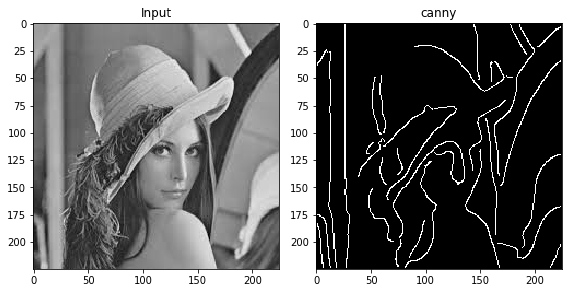

In [25]:
# canny 边缘
mage = io.imread("D:/lena.jpg")
gray = color.rgb2gray(mage)
edge = feature.canny(gray, 3)
fig,axes = plt.subplots(1,2,figsize=(8,4))   #返回一个figure图像，和ax子图列表
ax = axes.ravel()
ax[0].imshow(mage)
ax[0].set_title("Input")
ax[1].imshow(edge,cmap=plt.cm.gray)    # cmap = colormap
ax[1].set_title("canny")

fig.tight_layout()
plt.show()

In [26]:
# 骨架提取
image = data.horse()
gray = color.rgb2gray(image)
ret = filters.threshold_otsu(gray)
binary = gray < ret
skele = morphology.skeletonize(binary)

D:\Anaconda3\envs\tf3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


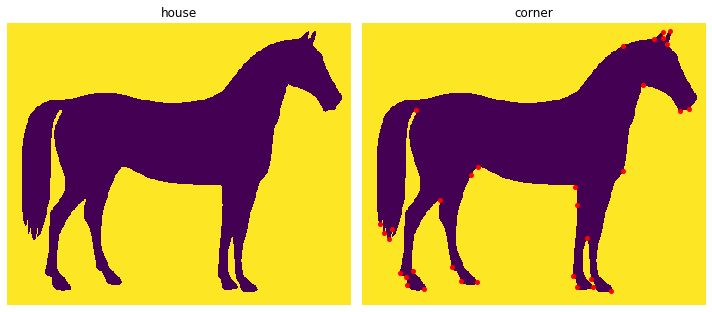

In [36]:
# Harris 角点
image = data.horse()
gray = color.rgb2gray(image)
coords = feature.corner_peaks(feature.corner_harris(gray), min_distance=5)
#print(coords)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(gray)
ax1.set_title("house")
ax1.axis('off')
ax2.imshow(image)
for n,coord in enumerate(coords):
    ax2.plot(coord[1],coord[0],color='red', marker='o', linestyle='None', markersize=4)
ax2.set_title("corner")
ax2.axis('off')
fig.tight_layout()
plt.show()

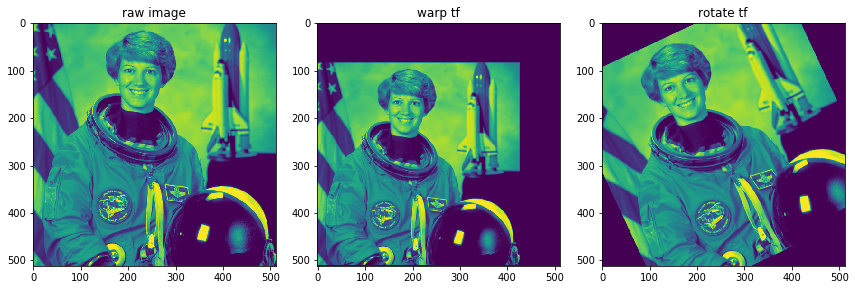

In [37]:
# 图像匹配
img1 = color.rgb2gray(data.astronaut())
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img2 = tf.warp(img1, tform)
img3 = tf.rotate(img1, 25)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax1.set_title("raw image")
ax2.set_title("warp tf")    #仿射变换
ax3.set_title("rotate tf")
fig.tight_layout()
plt.show()

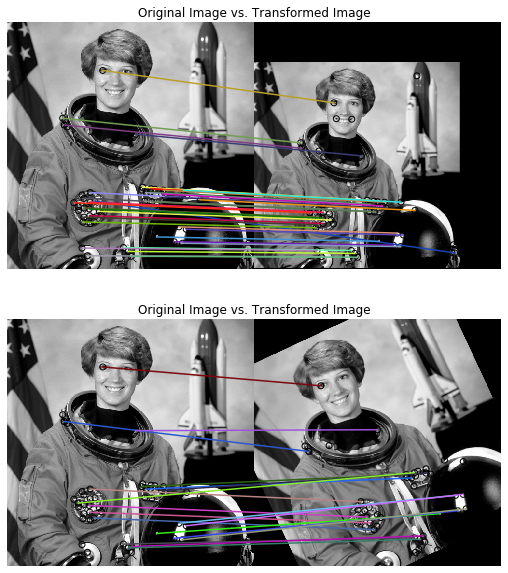

In [42]:
keypoints1 = feature.corner_peaks(feature.corner_harris(img1), min_distance=5)
keypoints2 = feature.corner_peaks(feature.corner_harris(img2), min_distance=5)
keypoints3 = feature.corner_peaks(feature.corner_harris(img3), min_distance=5)

extractor = feature.BRIEF()

extractor.extract(img1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors
extractor.extract(img2, keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors
extractor.extract(img3, keypoints3)
keypoints3 = keypoints3[extractor.mask]
descriptors3 = extractor.descriptors

matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = feature.match_descriptors(descriptors1, descriptors3, cross_check=True)
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(25,10))
plt.gray()
feature.plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")
feature.plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")

plt.show()